In [3]:
%pip install seaborn

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("emails.csv")
print(data.head())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [6]:
X=data.drop(columns=['Email No.', 'Prediction'], errors='ignore')
y= data['Prediction']

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42) #random state to get same accuracy result everytime

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) #fit-train
y_pred_knn = knn.predict(X_test) #predict

In [25]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [26]:
print("===== KNN Model Evaluation =====")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

===== KNN Model Evaluation =====
Accuracy: 0.8038095238095239
[[575 187]
 [ 19 269]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       762
           1       0.59      0.93      0.72       288

    accuracy                           0.80      1050
   macro avg       0.78      0.84      0.79      1050
weighted avg       0.86      0.80      0.81      1050



In [27]:
print("\n===== SVM Model Evaluation =====")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


===== SVM Model Evaluation =====
Accuracy: 0.939047619047619
[[726  36]
 [ 28 260]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       762
           1       0.88      0.90      0.89       288

    accuracy                           0.94      1050
   macro avg       0.92      0.93      0.92      1050
weighted avg       0.94      0.94      0.94      1050



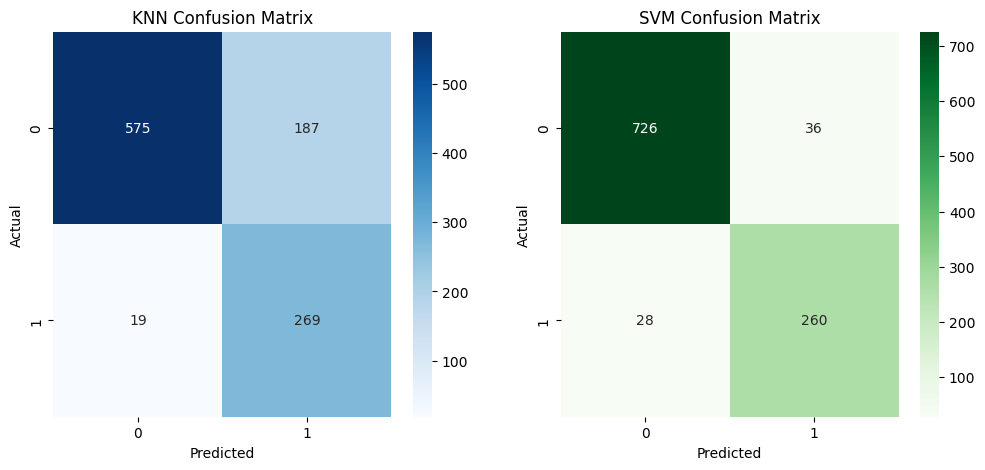

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("KNN Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("SVM Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()